# Foundations of Data Science
## S1 Week 08: Principal Component Analysis

**Learning outcomes:** 
In this lab you will implement PCA from scratch and compare your outcomes to the standard scikit-learn PCA. By the end of the lab you should be able to:
- explain the difference between standardization, normalization, and scaling,
- explain why it is important to standardize data prior to PCA,
- implement PCA from scratch,
- use the sklearn library to get the principal components from a data set.

In this lab we will first try to use PCA on a breast cancer patients data set in order to help predict whether a cancer is benign or malignant. As with the diabetes data set, this week, we will take only the first two steps (plotting our initial data and preparing our data). However, we will learn a new preprocessing step, which can be extremely beneficial to inspect our data and apply further steps more efficiently. In the next lab, we will run actual algorithms to predict the diagnosis of patients from their symptoms. 
In the last part of this lab, we will go back to the diabetes data set from week 05, in order to get one step closer to predicting whether patients have diabetes or not.

**Data set information:** The new data set is from [UCI](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). It contains patients information taken from patients with benign and malignant breast cancer.

**Pair programming:** We encourage you to work in pairs again. Remember that the magic command you need to get the link for the session with your partner is:

In [1]:
!echo "https://noteable.edina.ac.uk/user/$(jupyter notebook list | grep -oP '(?<=user\/).*(?=\/\?)' )/tree?token=$( jupyter notebook list | grep -oP '(?<=token=).*(?= ::)' )"

https://noteable.edina.ac.uk/user/jbw4vzrioh3iptep96vrsa/tree?token=SbkressZR1eNKoznQuDS8g


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Importing sklearn functions
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

**Discussion:** Try to remember with your lab partner what PCA is useful for.

Your answer:
- It makes it possible to visualize high-dimensional data
- It can improve the speed of ML algorithms, by reducing the complexity of the problem
- It makes other algorithms more noise resistant, by focussing only on relevant parts of the data.

We start as usual by loading data, inspecting data, and cleaning data.

**Exercise 01:**
- Load the `breast_cancer.csv` file from `datasets`, and store it as `breast_cancer`.
- Print out the first few lines of the data set.
- We have a few problems in the data set:
    - we don't need the patients' ids, and for privacy issues we want to remove them,
    - the diagnosis column has as values 'M' and 'B', which is in a format which makes it hard to apply mathematical operations to, and
    - the last column 'Unnamed: 32' seems completely useless.
- Fix the problems as follows:
     - Remove the `id` column, and the `Unnamed: 32` column.
     - Replace the 'M's and 'B's values with 1 and 0. (Hint: look up the documentation for `replace` in the pandas documentation).
     - Remove all rows that have NaN values.
- Plot the data set in a pair plot, where malignant and benign cancers are colored differently. (Hint: For speed up, and readability use only 8 columns of your choice.)
- Save the diagnosis column in a separate pandas series, called `diagnosis` and remove it from the `breast_cancer` dataframe.
-  Finally, print out the first few entries to make sure that all changes you made to the data set are as expected.

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


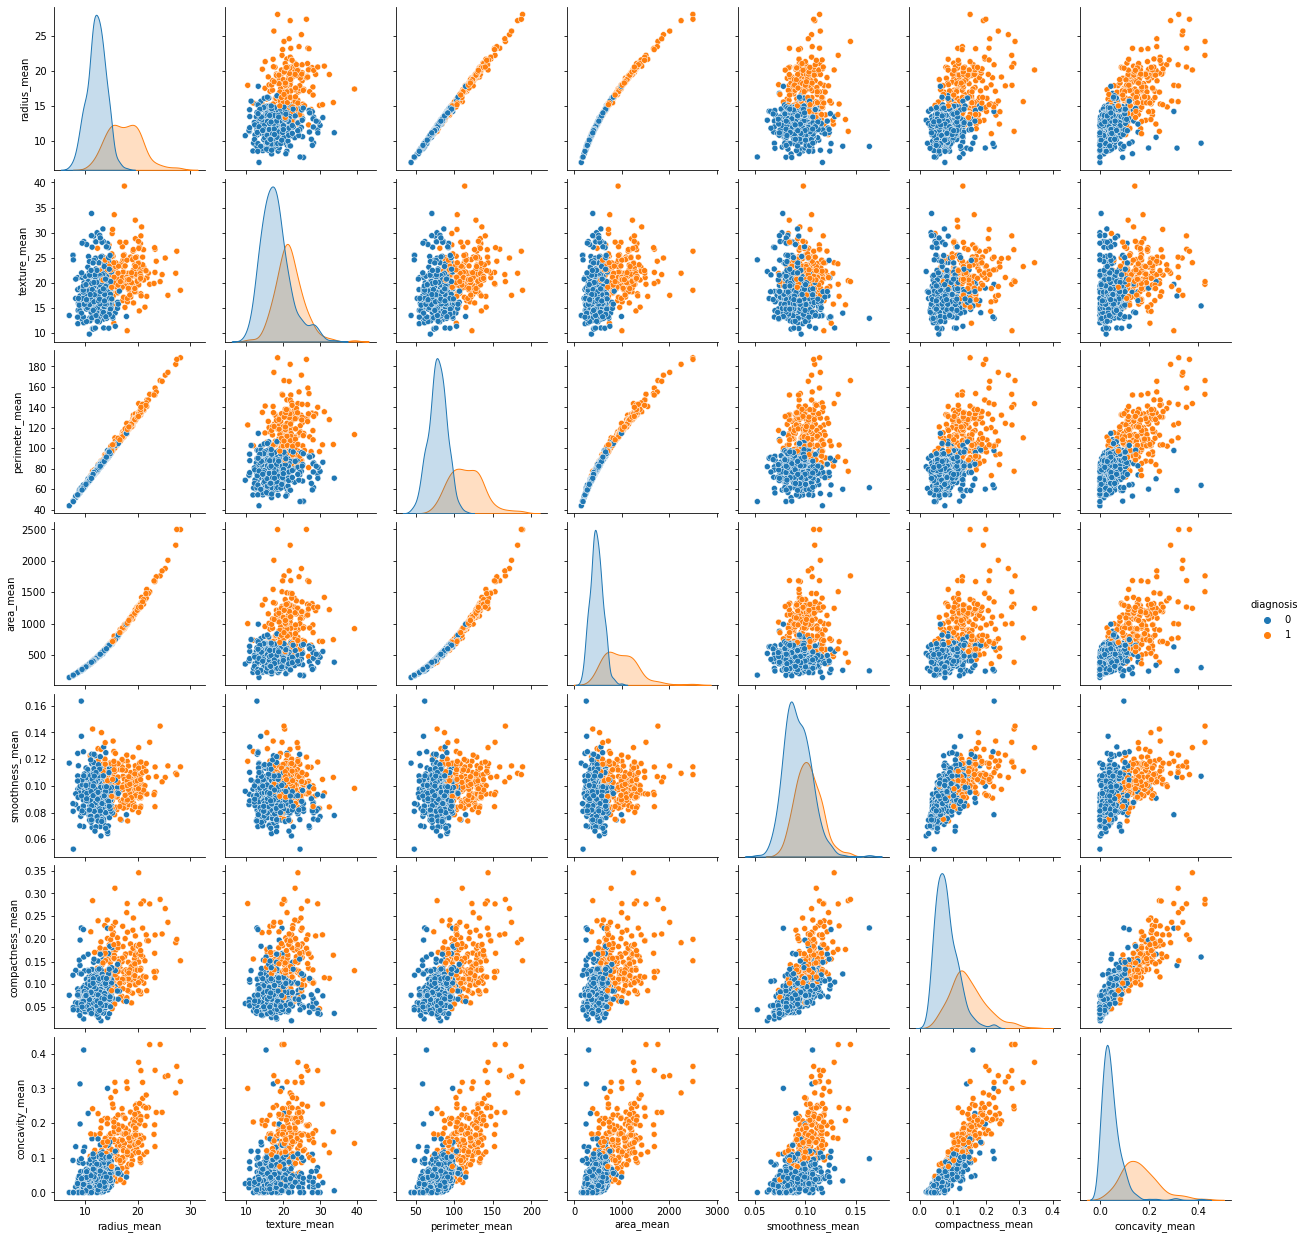

In [3]:
# Your code
breast_cancer = pd.read_csv(os.path.join(os.getcwd(), 'datasets', 'breast_cancer.csv'))
print(breast_cancer.head()) # As this is not the last line in the cell, it would not be printed to the screen without print()
breast_cancer.drop(columns = ['id', 'Unnamed: 32'], inplace=True)
breast_cancer['diagnosis'] = breast_cancer['diagnosis'].replace({'M':1, 'B':0})
breast_cancer.dropna(inplace=True) # Instead of inplace=True, you could also save the output of this line to the same variable
sns.pairplot(hue='diagnosis', data=breast_cancer[['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean']])
diagnosis = breast_cancer['diagnosis']
breast_cancer.drop(columns=['diagnosis'], inplace=True)
breast_cancer

At first glance, it already looks like there are some dimensions with a clear boundary between the two patient groups. Our goal will be to use PCA to make this distinction even clearer.

**Remark:** PCA can be especially helpful for data sets where the separation of classes is not that clear. But even in the case above, we might want to take several dimensions into consideration. Furthermore, visualising many more than the 8 variables above is challenging. PCA can help us with both problems.

The first step is to standardize the data, as described in the lecture notes. You may read about the similar operations of normalization or scaling when searching online - see this [short article](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02) (7 minutes) for descriptions of the terms.

**Discussion:** Discuss with your lab partner why standardization is important before applying PCA to a data set.

Your answer:
- Data could be on different scales (10.000 ml vs  10 L), and would thus have a larger weight, without explaining actual variance in the data set.

**Exercise 02:** 

Write a function `def standardize()` that takes as input a data set `df`, and returns a standardized data set. Try not to copy+paste code from the internet, but rather try to think of the math that needs to be applied to the data set. If you are stuck, look up the Week 5 lecture notes (Statistical Preliminaries topic).

Call the function on the data set and print it to the screen.

In [4]:
# Your code
def standardize(df):
    standardized = pd.DataFrame()
    for col in df.columns: # We can apply mathematical operation to entire columns at once, as they are built on top of numpy arrays
        standardized[col] = (df[col]-df[col].mean())/df[col].std() #For each column move the data s.t. it is centered around 0 and has variance=1
    return standardized
print(standardize(breast_cancer))

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.096100     -2.071512        1.268817   0.983510         1.567087   
1       1.828212     -0.353322        1.684473   1.907030        -0.826235   
2       1.578499      0.455786        1.565126   1.557513         0.941382   
3      -0.768233      0.253509       -0.592166  -0.763792         3.280667   
4       1.748758     -1.150804        1.775011   1.824624         0.280125   
..           ...           ...             ...        ...              ...   
564     2.109139      0.720838        2.058974   2.341795         1.040926   
565     1.703356      2.083301        1.614511   1.722326         0.102368   
566     0.701667      2.043775        0.672084   0.577445        -0.839745   
567     1.836725      2.334403        1.980781   1.733693         1.524426   
568    -1.806811      1.220718       -1.812793  -1.346604        -3.109349   

     compactness_mean  concavity_mean  concave points_mean  sym

Now, we write the PCA function.

**Exercise 03:**

Write a function `def principal_component_analysis()` that takes as input a data set `df`. The function should first standardize the data with your `standardize()` function, then compute the covariance matrix of the standardized data set, and finally compute and return the eigenvalues and eigenvectors of the covariance matrix. 

You may use `np.cov()` and `np.linalg.eig()` to compute the covariance matrix and the eigenvalues and eigenvectors. However, be careful about the shapes of your matrices and vectors. 

Call the function on the dataset, with the `breast_cancer` dataset and print it to the screen.

In [5]:
# Your code
def principal_component_analysis(df):
    standardized = standardize(df)
    cov_matrix = np.cov(standardized.values.T) # Transpose the dataset, as pandas stores data in rows x features and the covariance would be computed as the covariance of the rows, but we are interested in the covariance of the features
    return np.linalg.eig(cov_matrix)
print(principal_component_analysis(breast_cancer))

(array([1.32816077e+01, 5.69135461e+00, 2.81794898e+00, 1.98064047e+00,
       1.64873055e+00, 1.20735661e+00, 6.75220114e-01, 4.76617140e-01,
       4.16894812e-01, 3.50693457e-01, 2.93915696e-01, 2.61161370e-01,
       2.41357496e-01, 1.57009724e-01, 9.41349650e-02, 7.98628010e-02,
       5.93990378e-02, 5.26187835e-02, 4.94775918e-02, 1.33044823e-04,
       7.48803097e-04, 1.58933787e-03, 6.90046388e-03, 8.17763986e-03,
       1.54812714e-02, 1.80550070e-02, 2.43408378e-02, 2.74394025e-02,
       3.11594025e-02, 2.99728939e-02]), array([[ 2.18902444e-01, -2.33857132e-01, -8.53124284e-03,
         4.14089623e-02, -3.77863538e-02,  1.87407904e-02,
         1.24088340e-01,  7.45229622e-03, -2.23109764e-01,
         9.54864432e-02,  4.14714866e-02,  5.10674568e-02,
         1.19672116e-02, -5.95061348e-02,  5.11187749e-02,
        -1.50583883e-01,  2.02924255e-01,  1.46712338e-01,
        -2.25384659e-01, -7.02414091e-01,  2.11460455e-01,
        -2.11194013e-01, -1.31526670e-01,  1.294

**Exercise 04:** 

If you have read the documentation of `np.linalg.eig()` carefully, you should have read that the eigenvalues are not sorted in any way. However, for PCA, we are interested in a descending order of the eigenvalues (and according eigenvectors).

- Write a function `def sort_eigenvalues()`, which takes as first input `eigenvalues`, an array with eigenvalues, and as second input `eigenvectors`, a 2-D array with the associated eigenvectors. The function should sort the eigenvalues and eigenvectors such that the first eigenvalue is the biggest. 

Careful, look up the documentation of `np.linalg.eig()` again, to be sure how the eigenvalues are connected to the eigenvectors! Hint: `argsort()` from the numpy library might be helpful.

In [6]:
# Your code
def sort_eigenvalues(eigenvalues, eigenvectors):
    idx = eigenvalues.argsort()[::-1]   
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:,idx]
    return eigenvalues, eigenvectors

**Exercise 05:** 
- Rewrite your PCA function, such that it returns the eigenvalues and eigenvectors sorted largest to smallest.
- The function should also print out the percentage of the variance explained by each principal component, before returning the eigenvalues and eigenvectors.

In [7]:
# Your code
def principal_component_analysis(df):
    standardized = standardize(df)
    cov_matrix = np.cov(standardized.values.T)
    eigenvalues, eigenvectors =  np.linalg.eig(cov_matrix)
    eigenvalues, eigenvectors = sort_eigenvalues(eigenvalues, eigenvectors)
    for i in range(len(eigenvalues)):
        print('PC' + str(i+1) + ' explains ' + str(round((eigenvalues[i] / np.sum(eigenvalues))*100)) + '% of the variance.')
    return (eigenvalues, eigenvectors)
principal_component_analysis(breast_cancer)

PC1 explains 44% of the variance.
PC2 explains 19% of the variance.
PC3 explains 9% of the variance.
PC4 explains 7% of the variance.
PC5 explains 5% of the variance.
PC6 explains 4% of the variance.
PC7 explains 2% of the variance.
PC8 explains 2% of the variance.
PC9 explains 1% of the variance.
PC10 explains 1% of the variance.
PC11 explains 1% of the variance.
PC12 explains 1% of the variance.
PC13 explains 1% of the variance.
PC14 explains 1% of the variance.
PC15 explains 0% of the variance.
PC16 explains 0% of the variance.
PC17 explains 0% of the variance.
PC18 explains 0% of the variance.
PC19 explains 0% of the variance.
PC20 explains 0% of the variance.
PC21 explains 0% of the variance.
PC22 explains 0% of the variance.
PC23 explains 0% of the variance.
PC24 explains 0% of the variance.
PC25 explains 0% of the variance.
PC26 explains 0% of the variance.
PC27 explains 0% of the variance.
PC28 explains 0% of the variance.
PC29 explains 0% of the variance.
PC30 explains 0% of t

(array([1.32816077e+01, 5.69135461e+00, 2.81794898e+00, 1.98064047e+00,
        1.64873055e+00, 1.20735661e+00, 6.75220114e-01, 4.76617140e-01,
        4.16894812e-01, 3.50693457e-01, 2.93915696e-01, 2.61161370e-01,
        2.41357496e-01, 1.57009724e-01, 9.41349650e-02, 7.98628010e-02,
        5.93990378e-02, 5.26187835e-02, 4.94775918e-02, 3.11594025e-02,
        2.99728939e-02, 2.74394025e-02, 2.43408378e-02, 1.80550070e-02,
        1.54812714e-02, 8.17763986e-03, 6.90046388e-03, 1.58933787e-03,
        7.48803097e-04, 1.33044823e-04]),
 array([[ 2.18902444e-01, -2.33857132e-01, -8.53124284e-03,
          4.14089623e-02, -3.77863538e-02,  1.87407904e-02,
          1.24088340e-01,  7.45229622e-03, -2.23109764e-01,
          9.54864432e-02,  4.14714866e-02,  5.10674568e-02,
          1.19672116e-02, -5.95061348e-02,  5.11187749e-02,
         -1.50583883e-01,  2.02924255e-01,  1.46712338e-01,
         -2.25384659e-01, -4.96986642e-02,  6.85700057e-02,
         -7.29289034e-02,  9.85526

Let us compare our largest two eigenvalues and eigenvectors to the output of the PCA model from the sklearn library. The sklearn PCA does not standardize the data automatically, it only centers the data around 0. To get the same results as our implementation, we need to preprocess the data first.

In [8]:
standardized = standardize(breast_cancer)
pca = PCA(n_components=2).fit(standardized.values) # number of principil components that we are interested in
print(pca.explained_variance_) # Eigenvalues
print(pca.components_) # Eigenvector (Careful: sklearn returns the eigenvectors in columns in contrast to numpy)

[13.28160768  5.69135461]
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Finally, we want to visualize our PCA results.

**Exercise 06:**
- Call your `principal_component_analysis()` function on the data set and store the return values.
- Apply the first two PC vectors to the standardized(!) data set and store it in a new variable `result`. (Careful about the orientation of your arrays.)
- Plot a scatterplot from the data in `result`, where you use `hue = diagnosis` to color the different data points according to the type of cancer they represent.
- Can you spot a clear separation between benign and malignant cancer?

PC1 explains 44% of the variance.
PC2 explains 19% of the variance.
PC3 explains 9% of the variance.
PC4 explains 7% of the variance.
PC5 explains 5% of the variance.
PC6 explains 4% of the variance.
PC7 explains 2% of the variance.
PC8 explains 2% of the variance.
PC9 explains 1% of the variance.
PC10 explains 1% of the variance.
PC11 explains 1% of the variance.
PC12 explains 1% of the variance.
PC13 explains 1% of the variance.
PC14 explains 1% of the variance.
PC15 explains 0% of the variance.
PC16 explains 0% of the variance.
PC17 explains 0% of the variance.
PC18 explains 0% of the variance.
PC19 explains 0% of the variance.
PC20 explains 0% of the variance.
PC21 explains 0% of the variance.
PC22 explains 0% of the variance.
PC23 explains 0% of the variance.
PC24 explains 0% of the variance.
PC25 explains 0% of the variance.
PC26 explains 0% of the variance.
PC27 explains 0% of the variance.
PC28 explains 0% of the variance.
PC29 explains 0% of the variance.
PC30 explains 0% of t

Text(0, 0.5, 'PC2')

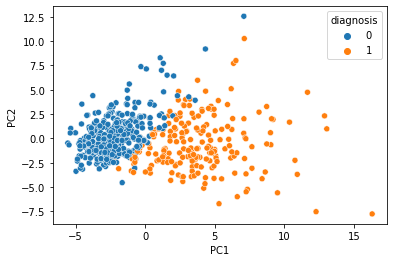

In [9]:
# Your code
standardized = standardize(breast_cancer)
e_values, e_vectors = principal_component_analysis(breast_cancer) #e_vectors is already in the right format
result = standardized.dot(e_vectors[:,:2])
sns.scatterplot(x= result[0], y = result[1], hue=diagnosis)
plt.xlabel('PC1')
plt.ylabel('PC2')

Finally, let us apply the sklearn model we fitted above to the data. Again, we need to apply it to the standardized data. Because multiplying the data with the principal component vectors transforms the data, the method we need to call is `model.transform()`.

Text(0, 0.5, 'PC2')

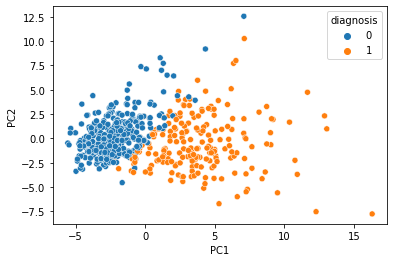

In [10]:
standardized = standardize(breast_cancer)
pca = PCA(n_components=30).fit(standardized.values)
pca_result = pca.transform(standardized.values)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=diagnosis)
plt.xlabel('PC1')
plt.ylabel('PC2')

**Exercise 07:**

In the week 05 lab, we started to look at a diabetes data set. The last activity in this lab is to see if PCA will also help us to visualize that data set.

a)

- Load the diabetes data set.
- Plot the pair plot of that lab, with `hue='Outcome'`.
- Do you think that PCA will give a clear cut distinction that is as good as for the breast cancer data set? Hint: Compare the pair plot of the diabetes data set and the breast cancer data set.
- See if you can remember how the data should be cleaned to remove data points that seem erroneous.

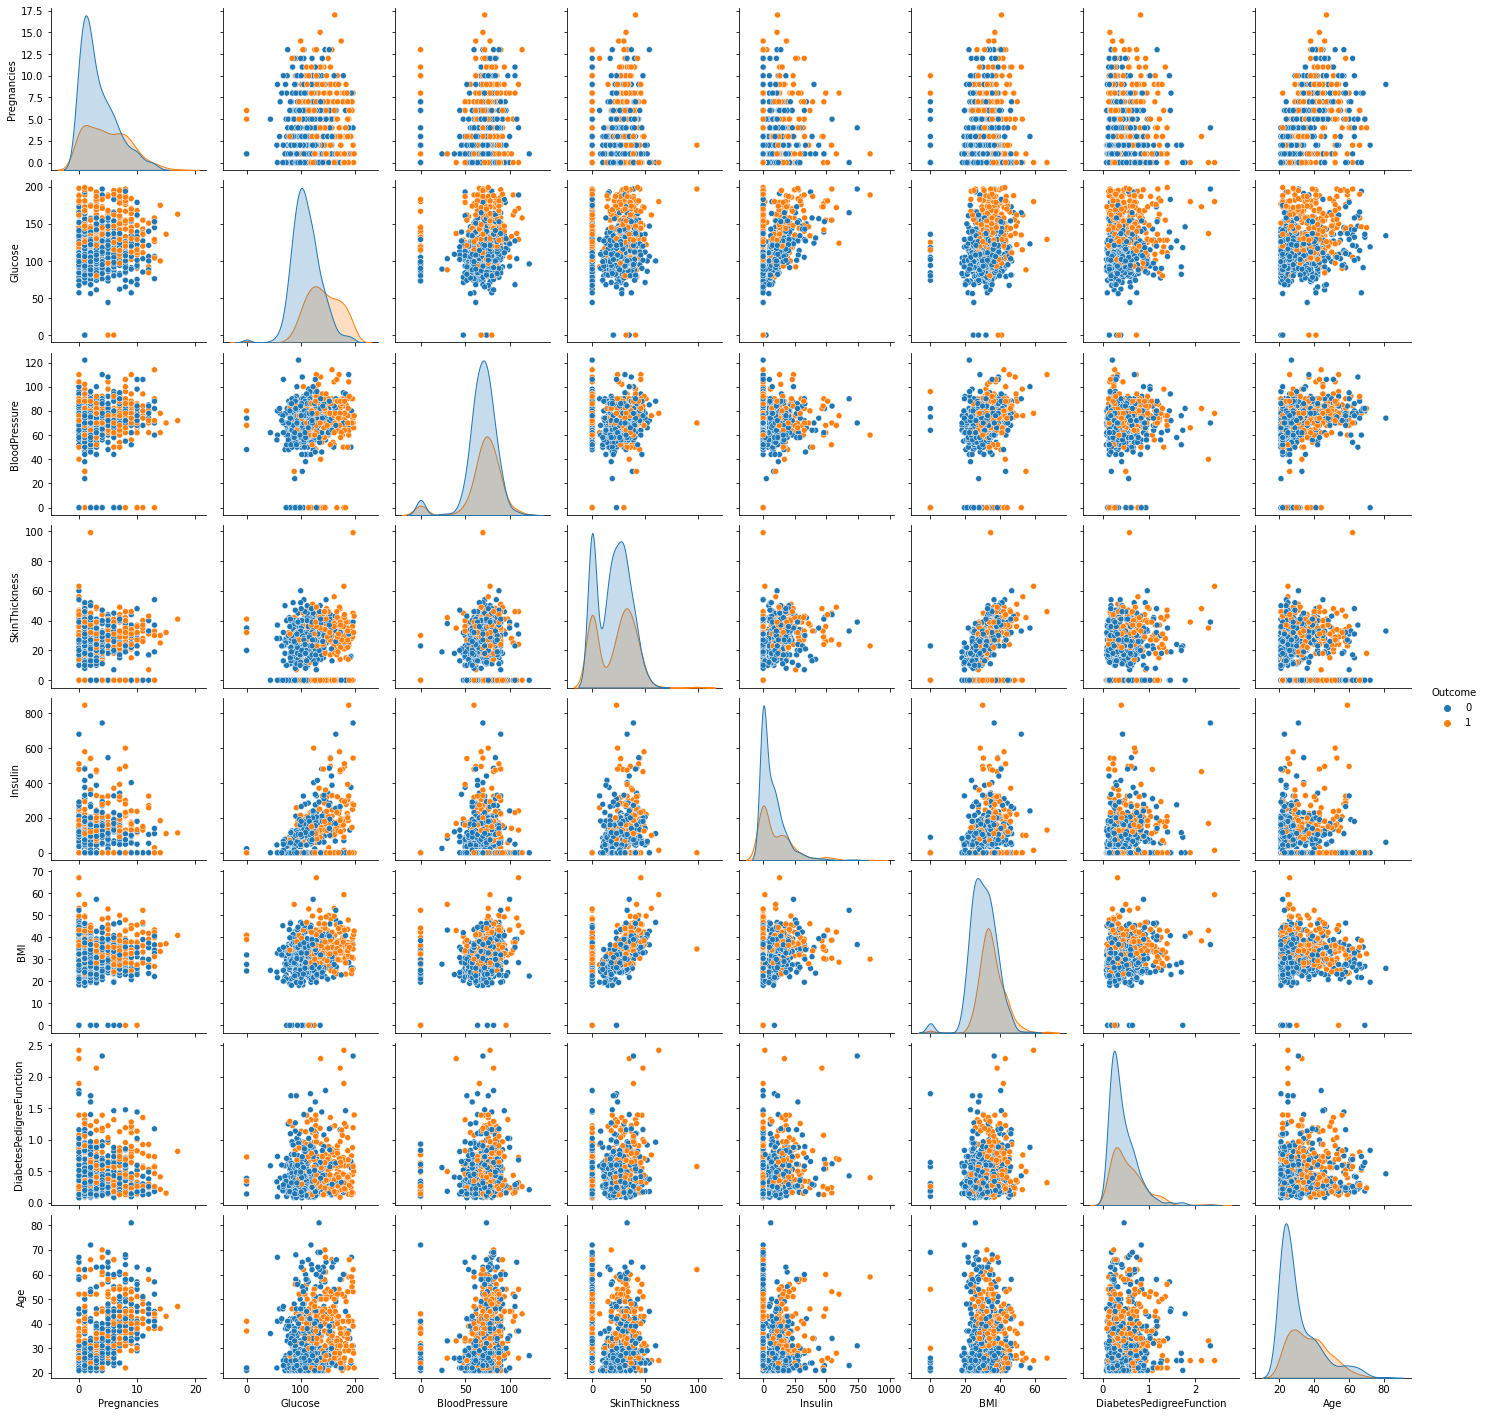

In [11]:
diabetes_loc = os.path.join(os.getcwd(), 'datasets', 'diabetes.csv')
diabetes = pd.read_csv(diabetes_loc)
sns.pairplot(hue='Outcome', data=diabetes)
# The distinction seems far less clear than in the breast cancer data set, as many more data points overlap
diabetes = diabetes[(diabetes['Glucose']>0) 
                    & (diabetes['BloodPressure']>0) 
                    & (diabetes['SkinThickness']>0)
                    & (diabetes['Insulin']>0)
                    & (diabetes['BMI']>0)]

b) 
- Create a new Pandas Series from the `Outcome` column, store it in `diagnosis_diabetes`, and drop the column from your data set.
- Apply your PCA model, and plot the scatter plot of the first two principal components.

PC1 explains 32% of the variance.
PC2 explains 19% of the variance.
PC3 explains 15% of the variance.
PC4 explains 12% of the variance.
PC5 explains 9% of the variance.
PC6 explains 5% of the variance.
PC7 explains 4% of the variance.
PC8 explains 4% of the variance.


Text(0, 0.5, 'PC2')

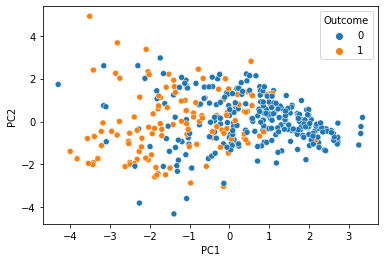

In [12]:
# Your code
diagnosis_diabetes = diabetes['Outcome']
diabetes.drop(columns=['Outcome'], inplace=True)
standardized_diabetes = standardize(diabetes)
e_values, e_vectors = principal_component_analysis(diabetes) #e_vectors is already in the right format
result_diabetes = standardized_diabetes.dot(e_vectors[:,:3])
sns.scatterplot(x= result_diabetes[0], y = result_diabetes[1], hue=diagnosis_diabetes)
plt.xlabel('PC1')
plt.ylabel('PC2')

**Discussion:**

Discuss with your lab partner whether you can already make out two distinct clusters.
Look at the output of your PCA algorithm, and see how many PCs you would need to take into account to get as much explanation as with the first two components of the breast cancer example.

We cannot plot scatter plots with more than three dimensions, however, we can at least plot three dimensions. Run the following script, and discuss whether it looks like we can distinguish diabetes from non-diabetes patients. Hint: Remember that you can set the range of variables with `ax.set_xlim([xmin,xmax])`, in order to look at a range of interest closer.

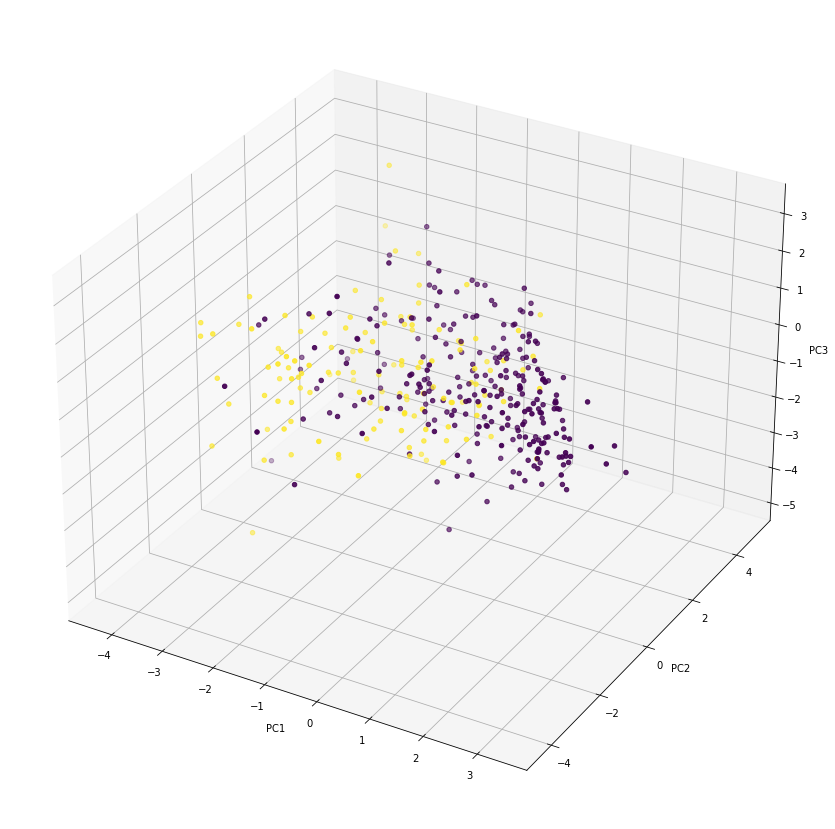

In [13]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(result_diabetes[0], result_diabetes[1], result_diabetes[2], c=diagnosis_diabetes)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

In a later lab, we will use K-Means to try to cluster the patients with and without diabetes into two different groups, and then we will try to predict whether new patients have diabetes.

**Optional Exercise:**

Compare the output of your PCA algorithm to a PCA applied to the data set without having cleaning it before. Hint: You might have to reload the data set, if you haven't stored the cleaned data set in a separate variable.

PC1 explains 32% of the variance.
PC2 explains 19% of the variance.
PC3 explains 15% of the variance.
PC4 explains 12% of the variance.
PC5 explains 9% of the variance.
PC6 explains 5% of the variance.
PC7 explains 4% of the variance.
PC8 explains 4% of the variance.


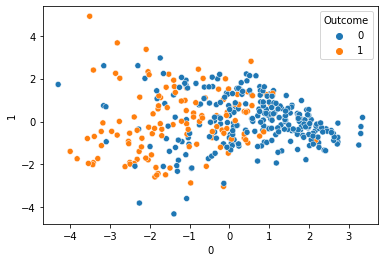

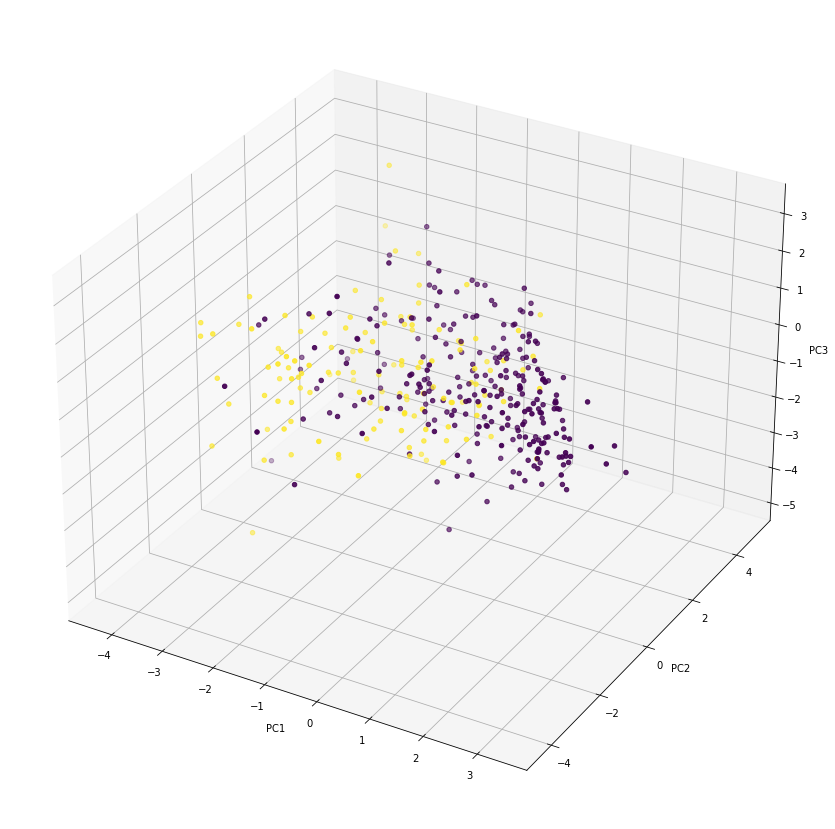

In [14]:
# Your code
e_values, e_vectors = principal_component_analysis(standardized_diabetes) #e_vectors is already in the right format
result_diabetes = standardized_diabetes.dot(e_vectors[:,:3])
sns.scatterplot(x= result_diabetes[0], y = result_diabetes[1], hue=diagnosis_diabetes)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(result_diabetes[0], result_diabetes[1], result_diabetes[2], c=diagnosis_diabetes)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()